## COVID-19 data

Analysing a dataset with information about the COVID-19.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

In [2]:
file = "data/covid_19_data.csv"
covid_df = pd.read_csv(file, ",")
covid_df.head(3)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa


In [3]:
covid_df.shape

(49068, 10)

In [4]:
covid_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [5]:
covid_df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [7]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format="%Y-%m-%d")

In [8]:
covid_df['Date'].dt.year.head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: Date, dtype: int64

In [9]:
covid_df['Date'].dt.month.tail()

49063    7
49064    7
49065    7
49066    7
49067    7
Name: Date, dtype: int64

In [10]:
monthly_covid_df = covid_df.copy()
monthly_covid_df['Date'] = monthly_covid_df['Date'].dt.month

In [12]:
monthly_covid_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,1,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,1,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,1,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,1,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,1,0,0,0,0,Africa


In [13]:
monthly_covid_df.sort_values(by=['Deaths'], inplace=True)

In [14]:
monthly_covid_df.drop_duplicates(['Province/State', 'Country/Region', 'Date'], keep='last', inplace=True)

In [17]:
monthly_deaths = monthly_covid_df.groupby(monthly_covid_df['Date'])['Deaths'].sum()
monthly_deaths

Date
1       213
2      2936
3     44483
4    234705
5    375231
6    511212
7    654037
Name: Deaths, dtype: int64

In [18]:
monthly_france_df = covid_df.copy()
monthly_france_df.Date = monthly_france_df.Date.dt.month
monthly_france_df = monthly_france_df[monthly_france_df["Country/Region"] == "France"]
monthly_france_df.sort_values(by=['Deaths'], inplace=True)
monthly_france_df.drop_duplicates(['Province/State', 'Country/Region', 'Date'], keep='last', inplace=True)
monthly_france_deaths_df = monthly_france_df.groupby(monthly_france_df['Date'])['Deaths'].sum()
monthly_france_deaths_df

Date
1        0
2        2
3     3532
4    24379
5    28805
6    29846
7    30212
Name: Deaths, dtype: int64

Text(0.5, 0, 'Month')

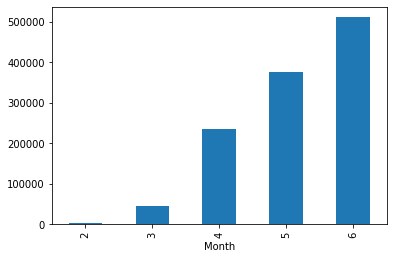

In [19]:
peak_monthly_deaths = monthly_deaths[np.logical_and(monthly_deaths.index > 1, monthly_deaths.index < 7)].copy()
plot = peak_monthly_deaths.plot(kind="bar")
plot.set_xlabel("Month")

In [21]:
monthly_uk_df = covid_df.copy()
monthly_uk_df.Date = monthly_uk_df.Date.dt.month
monthly_uk_df = monthly_uk_df[monthly_uk_df["Country/Region"] == "United Kingdom"]
monthly_uk_df.sort_values(by=['Confirmed'], inplace=True)
monthly_uk_df.drop_duplicates(['Country/Region', 'Date'], keep='last', inplace=True)
monthly_uk_cases_df = monthly_uk_df[['Date', 'Country/Region', 'Confirmed', 'Deaths']]
monthly_uk_cases_df

,Date,Country/Region,Confirmed,Deaths
2570,1,United Kingdom,2,0
10139,2,United Kingdom,61,0
18230,3,United Kingdom,38484,2426
26060,4,United Kingdom,177543,26788
34151,5,United Kingdom,256145,39010
41981,6,United Kingdom,283710,43730
49028,7,United Kingdom,300111,45759


In [22]:
uk_confirmed_monthly = monthly_uk_df.groupby(monthly_uk_df["Date"]).sum()["Confirmed"]
uk_confirmed_monthly

Date
1         2
2        61
3     38484
4    177543
5    256145
6    283710
7    300111
Name: Confirmed, dtype: int64

In [23]:
monthly_france_cases_df = monthly_france_df[['Date', 'Country/Region', 'Confirmed', 'Deaths']]
monthly_france_cases_df

,Date,Country/Region,Confirmed,Deaths
18642,4,France,6,0
18641,4,France,308,0
18640,4,France,18,0
18637,4,France,37,0
45523,7,France,21,0
...,...,...,...,...
18123,3,France,52128,3523
25953,4,France,165764,24345
34044,5,France,185851,28751
41874,6,France,194373,29763


In [24]:
monthly_uk_df = covid_df.copy()
monthly_uk_df.Date = monthly_uk_df.Date.dt.month
monthly_uk_df = monthly_uk_df[monthly_uk_df["Country/Region"] == "United Kingdom"]
monthly_uk_df.sort_values(by=['Confirmed'], inplace=True)
monthly_uk_df.drop_duplicates(['Country/Region', 'Date'], keep='last', inplace=True)
monthly_uk_cases_df = monthly_uk_df[['Date', 'Country/Region', 'Confirmed', 'Deaths']]
monthly_uk_cases_df

,Date,Country/Region,Confirmed,Deaths
2570,1,United Kingdom,2,0
10139,2,United Kingdom,61,0
18230,3,United Kingdom,38484,2426
26060,4,United Kingdom,177543,26788
34151,5,United Kingdom,256145,39010
41981,6,United Kingdom,283710,43730
49028,7,United Kingdom,300111,45759


In [25]:
monthly_france_confirmed_df = monthly_france_cases_df.groupby(monthly_france_cases_df["Date"]).sum()["Confirmed"]
monthly_france_confirmed_df

Date
1         0
2        18
3     52495
4    166863
5    188640
6    202041
7    220299
Name: Confirmed, dtype: int64

In [26]:
uk_confirmed_monthly = monthly_uk_df.groupby(monthly_uk_df["Date"]).sum()["Confirmed"]
uk_confirmed_monthly

Date
1         2
2        61
3     38484
4    177543
5    256145
6    283710
7    300111
Name: Confirmed, dtype: int64

<AxesSubplot:xlabel='Date'>

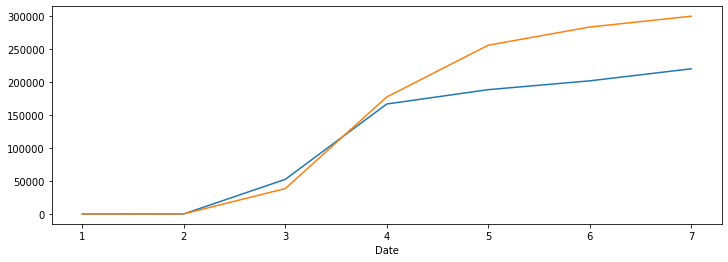

In [27]:
ax = monthly_france_confirmed_df.plot(figsize=(12,4))
uk_confirmed_monthly.plot(ax=ax)